# Assignment #7
### Gagana Uday Kumar (WOV796)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns


### 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows: 
### rng = np.random.default_rng(5)
### x1 = rng.uniform(size=500) - 0.5
### x2 = rng.uniform(size=500) - 0.5
### y = x1**2 - x2**2 > 0

In [2]:
np.random.seed(5)
n = 500
x1 = np.random.uniform(size=n) - 0.5
x2 = np.random.uniform(size=n) - 0.5
y = (x1**2 - x2**2 > 0).astype(int)

### (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

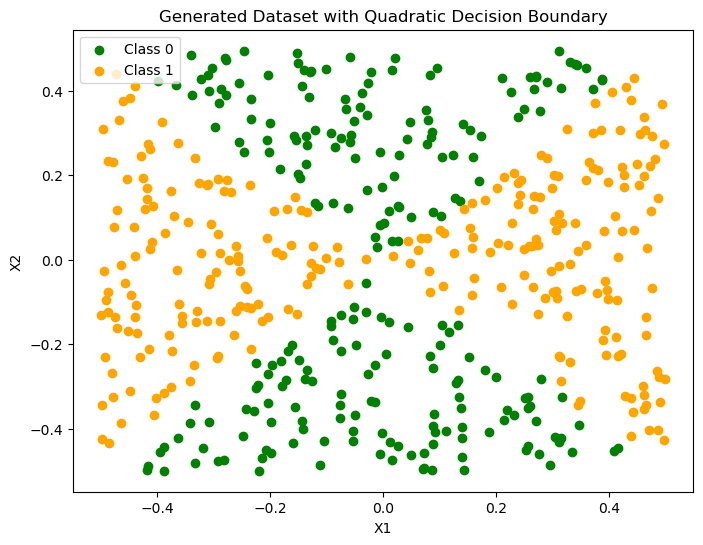

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x1[y == 0], x2[y == 0], color='green', label='Class 0')
plt.scatter(x1[y == 1], x2[y == 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Dataset with Quadratic Decision Boundary')
plt.legend()
plt.show()

### (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [5]:
X = np.column_stack((x1, x2))
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

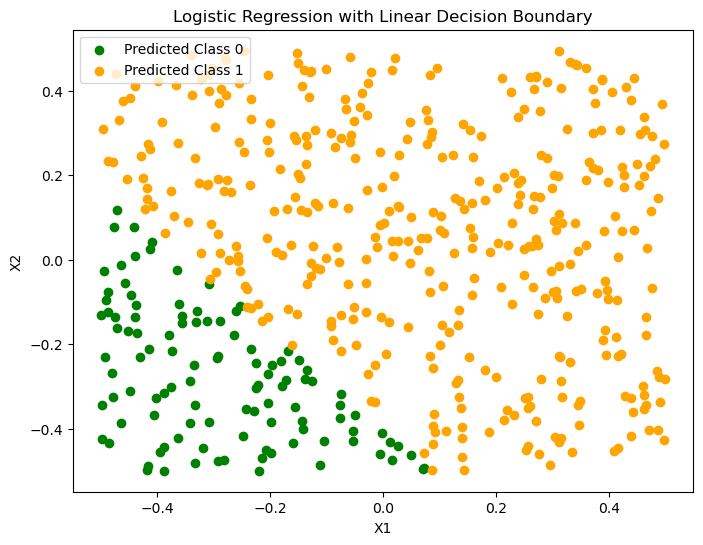

In [9]:
y_pred_linear = log_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred_linear == 0][:, 0], X[y_pred_linear == 0][:, 1], color='Green', label='Predicted Class 0')
plt.scatter(X[y_pred_linear == 1][:, 0], X[y_pred_linear == 1][:, 1], color='orange', label='Predicted Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Linear Decision Boundary')
plt.legend()
plt.show()

### (e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X2 1 , X1×X2, log(X2), and so forth).

In [11]:
X_nonlinear = np.column_stack((x1, x2, x1**2, x2**2, x1*x2))

# Fit a logistic regression model using non-linear features
model_nonlinear = LogisticRegression()
model_nonlinear.fit(X_nonlinear, y)

LogisticRegression()

### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

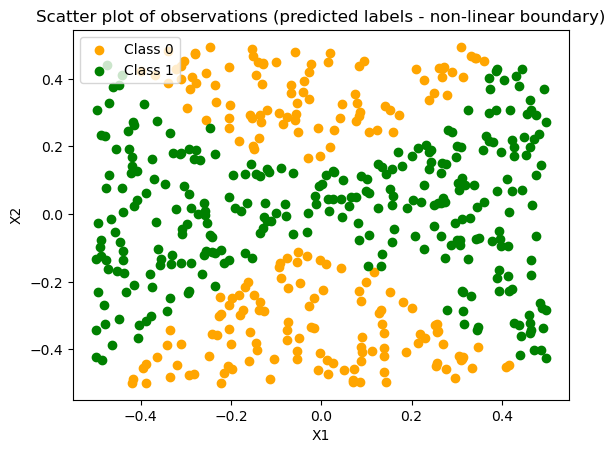

In [13]:
pred_labels_nonlinear = model_nonlinear.predict(X_nonlinear)

# Plot the observations colored according to the predicted class labels
plt.scatter(x1[pred_labels_nonlinear == 0], x2[pred_labels_nonlinear == 0], color='orange', label='Class 0')
plt.scatter(x1[pred_labels_nonlinear == 1], x2[pred_labels_nonlinear == 1], color='green', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of observations (predicted labels - non-linear boundary)')
plt.legend()
plt.show()

### (g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

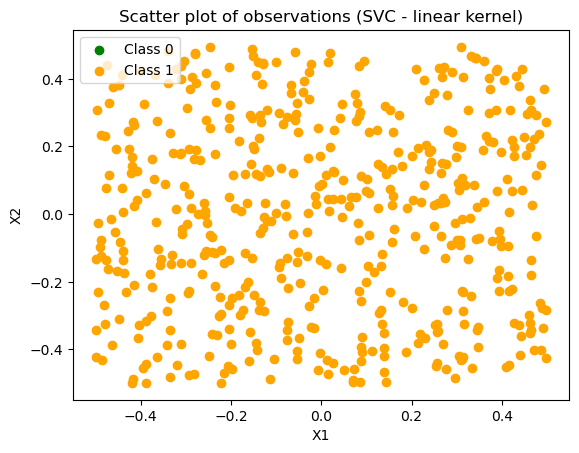

In [29]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)

# Obtain a class prediction for each training observation
pred_labels_svc_linear = svc_linear.predict(X)

# Plot the observations colored according to the predicted class labels
plt.scatter(x1[pred_labels_svc_linear == 0], x2[pred_labels_svc_linear == 0], color='green', label='Class 0')
plt.scatter(x1[pred_labels_svc_linear == 1], x2[pred_labels_svc_linear == 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of observations (SVC - linear kernel)')
plt.legend()
plt.show()

### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

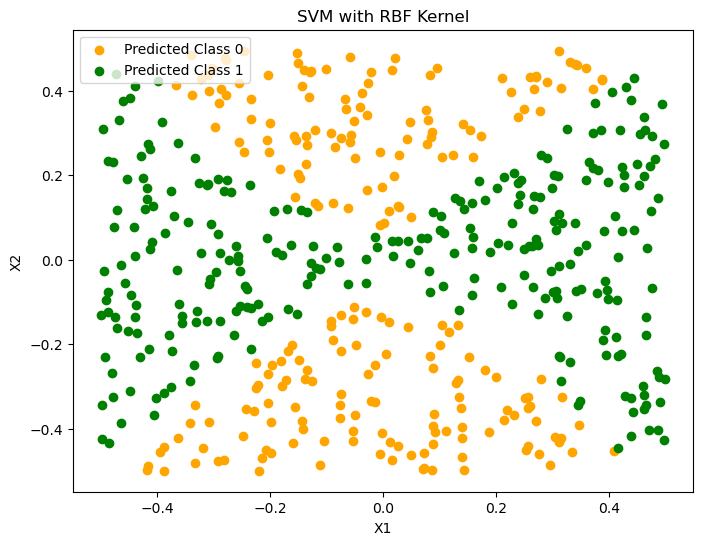

In [28]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X, y)
y_pred_rbf = svm_rbf.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred_rbf == 0][:, 0], X[y_pred_rbf == 0][:, 1], color='orange', label='Predicted Class 0')
plt.scatter(X[y_pred_rbf == 1][:, 0], X[y_pred_rbf == 1][:, 1], color='green', label='Predicted Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM with RBF Kernel')
plt.legend()
plt.show()

### (i) Comment on your results.

In [22]:
print("Summary of results:")
print(f"Linear Logistic Regression - Accuracy: {accuracy_score(y, y_pred_linear):.2%}")
print(f"Non-Linear Logistic Regression - Accuracy: {accuracy_score(y, pred_labels_nonlinear):.2%}")
print(f"SVM with Linear Kernel - Accuracy: {accuracy_score(y, y_pred_svc):.2%}")
print(f"SVM with RBF Kernel - Accuracy: {accuracy_score(y, y_pred_rbf):.2%}")

Summary of results:
Linear Logistic Regression - Accuracy: 53.00%
Non-Linear Logistic Regression - Accuracy: 94.40%
SVM with Linear Kernel - Accuracy: 52.60%
SVM with RBF Kernel - Accuracy: 97.40%


The results indicate that models capable of capturing non-linear decision boundaries significantly outperform those restricted to linear boundaries. Linear logistic regression and SVM with a linear kernel both struggled to classify the data accurately, achieving accuracies near chance. In contrast, non-linear logistic regression and SVM with an RBF kernel excelled, achieving high accuracies of 94.40% and 97.40%, respectively. These results emphasize the importance of selecting a model that aligns with the complexity of the decision boundary in the data, particularly when it is non-linear.

### 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [37]:
Auto = pd.read_csv('Auto.csv',na_values=['?'])
Auto = Auto.dropna()
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [38]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [39]:
# Calculate the median mpg
median_mpg = Auto['mpg'].median()

# Create a binary column for high or low gas mileage
Auto['high_mpg'] = (Auto['mpg'] > median_mpg).astype(int)

# Display the first few rows to verify the new column
print(Auto.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  high_mpg  
0       1  chevrolet chevelle malibu         0  
1       1          buick skylark 320         0  
2       1         plymouth satellite         0  
3       1              amc rebel sst         0  
4       1                ford torino         0  


### (b) Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

In [48]:
# Define the features and target
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = Auto['high_mpg']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of C values to experiment with
C_values = [0.1, 1, 10, 100, 1000]

# Fit the SVC model with different values of C and perform cross-validation
for C in C_values:
    svc_model = SVC(C=C, kernel='linear', random_state=1)
    cv_scores = cross_val_score(svc_model, X_scaled, y, cv=10, scoring='accuracy')
    print(f"C={C}: Mean CV Accuracy = {cv_scores.mean():.4f}")


C=0.1: Mean CV Accuracy = 0.8928
C=1: Mean CV Accuracy = 0.9033
C=10: Mean CV Accuracy = 0.9033
C=100: Mean CV Accuracy = 0.9008
C=1000: Mean CV Accuracy = 0.9008


### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Comment on your results.

In [49]:
# Define parameter grids for radial and polynomial kernels
param_grid_radial = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3],
    'kernel': ['poly']
}

# GridSearchCV for radial kernel
grid_search_radial = GridSearchCV(SVC(random_state=1), param_grid=param_grid_radial, cv=10, scoring='accuracy')
grid_search_radial.fit(X_scaled, y)

# GridSearchCV for polynomial kernel
grid_search_poly = GridSearchCV(SVC(random_state=1), param_grid=param_grid_poly, cv=10, scoring='accuracy')
grid_search_poly.fit(X_scaled, y)

# Print the best parameters and best scores
print(f"Best parameters (Radial Kernel): {grid_search_radial.best_params_}")
print(f"Best accuracy (Radial Kernel): {grid_search_radial.best_score_:.4f}")
print(f"Best parameters (Poly Kernel): {grid_search_poly.best_params_}")
print(f"Best accuracy (Poly Kernel): {grid_search_poly.best_score_:.4f}")


Best parameters (Radial Kernel): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best accuracy (Radial Kernel): 0.9131
Best parameters (Poly Kernel): {'C': 10, 'degree': 3, 'kernel': 'poly'}
Best accuracy (Poly Kernel): 0.9034


### (d) Make some plots to back up your assertions in (b) and (c).
### Hint: In the lab, we used the plot_svm() function for fitted SVMs. When p > 2, you can use the keyword argument features to create plots displaying pairs of variables at a time.

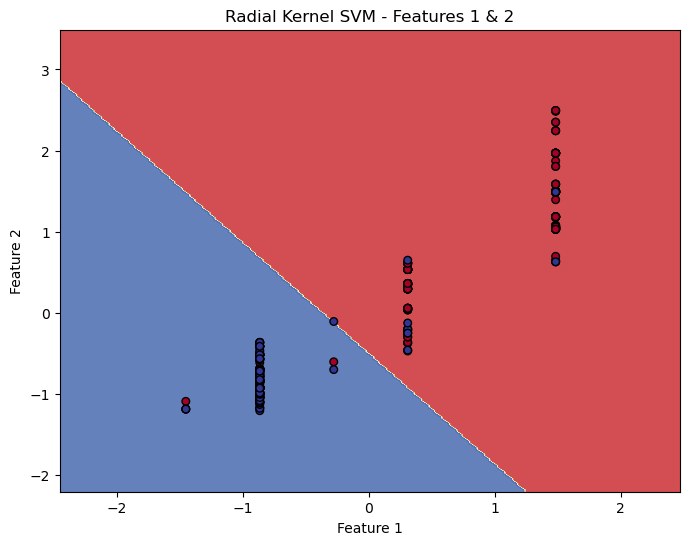

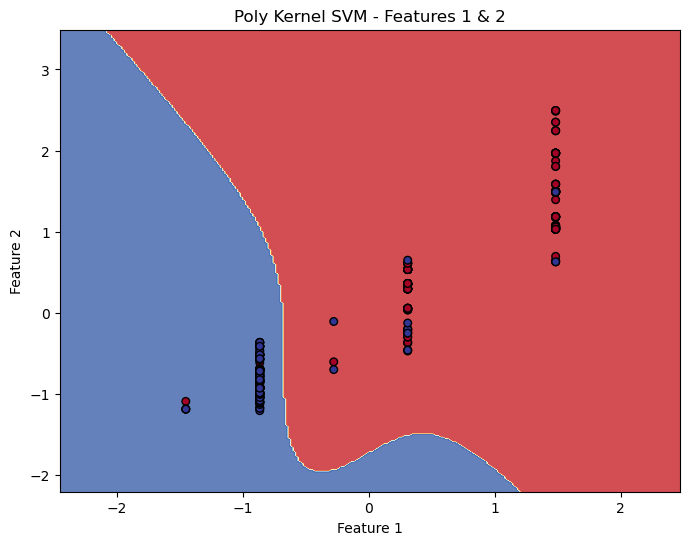

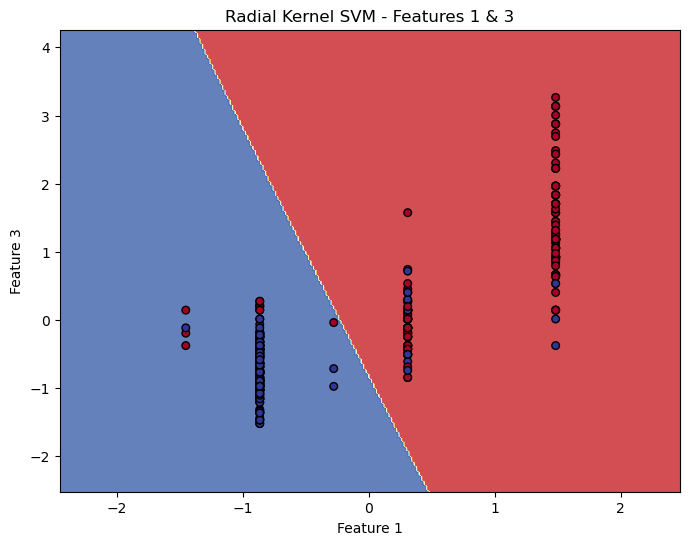

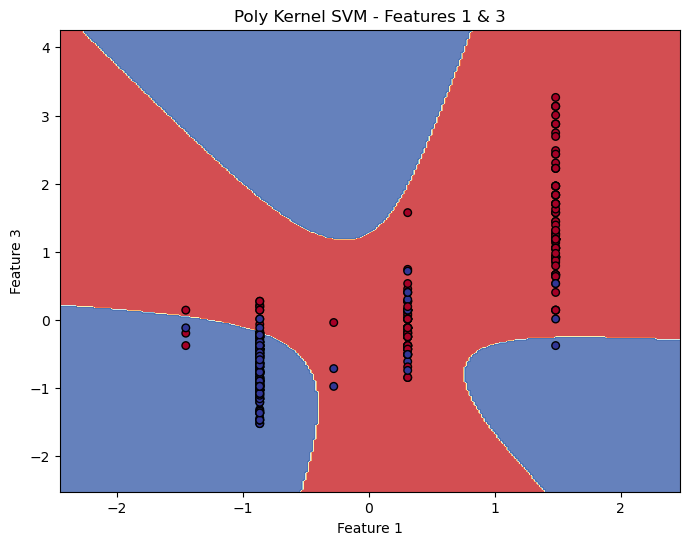

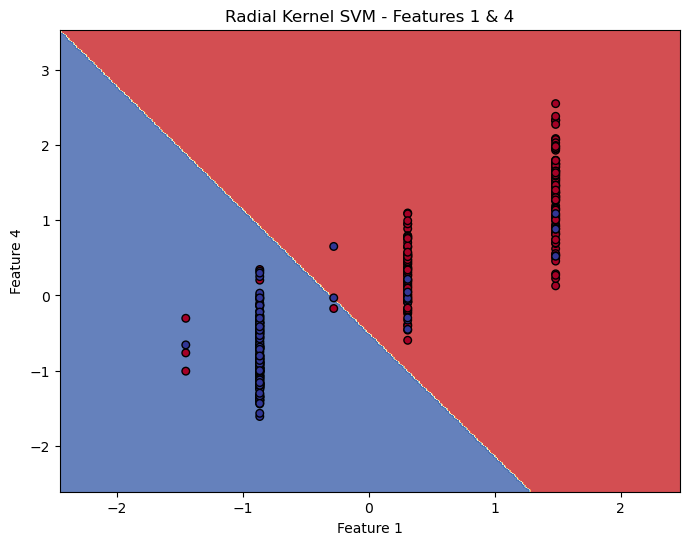

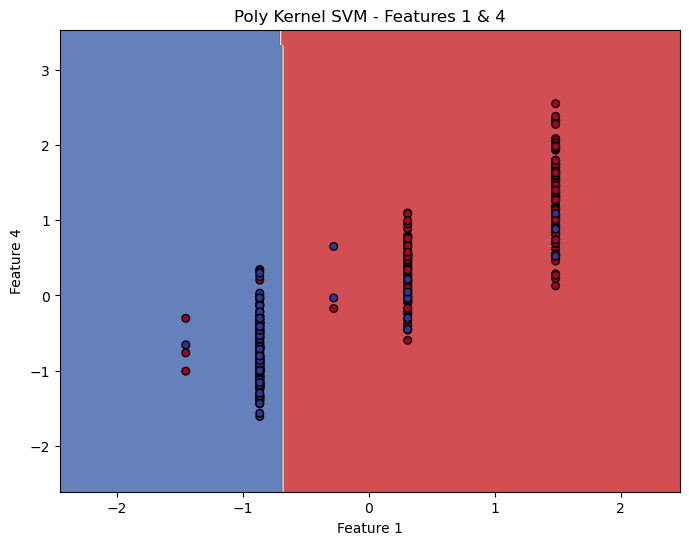

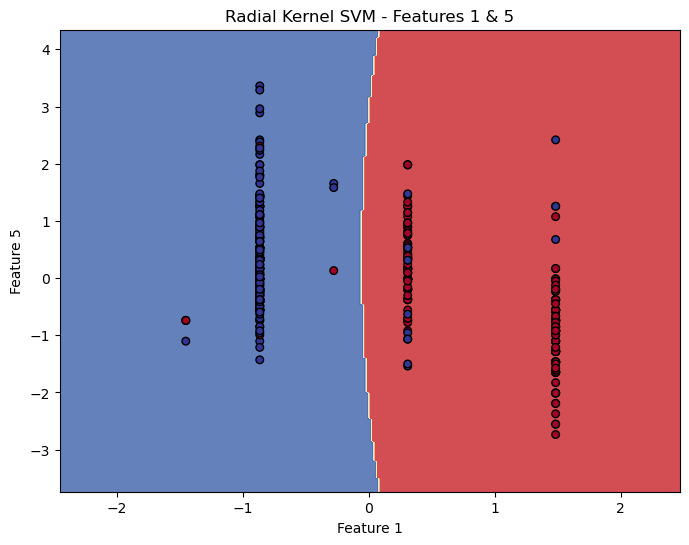

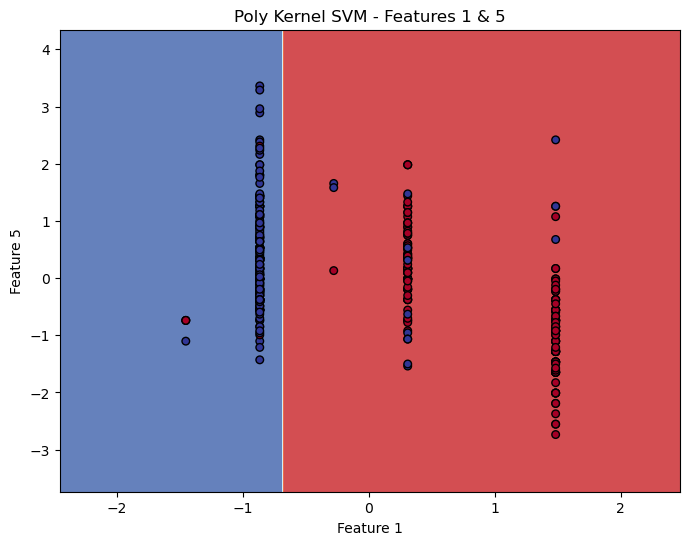

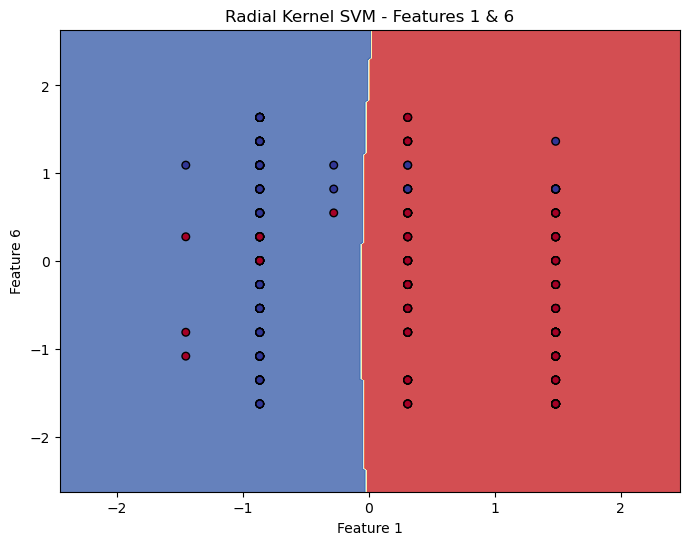

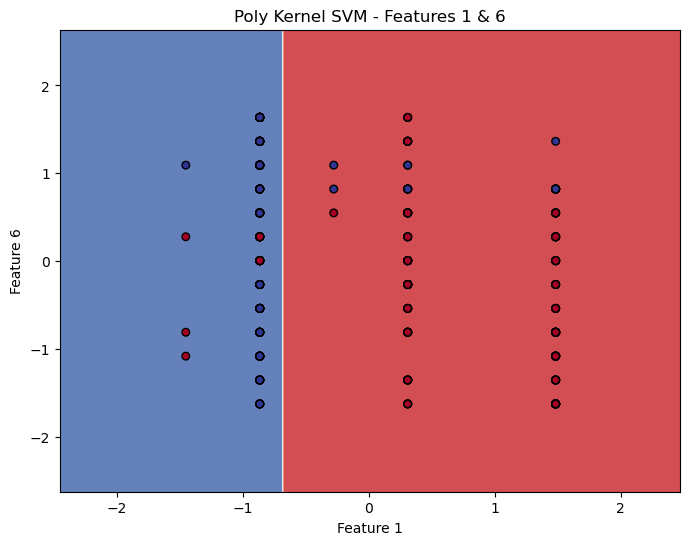

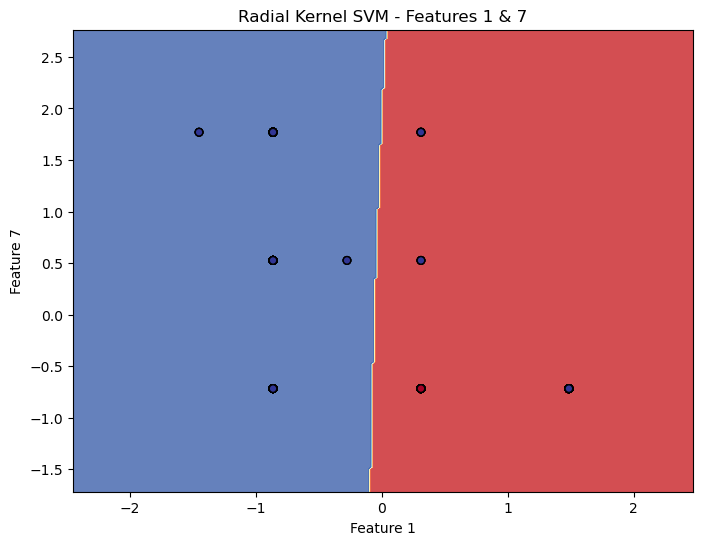

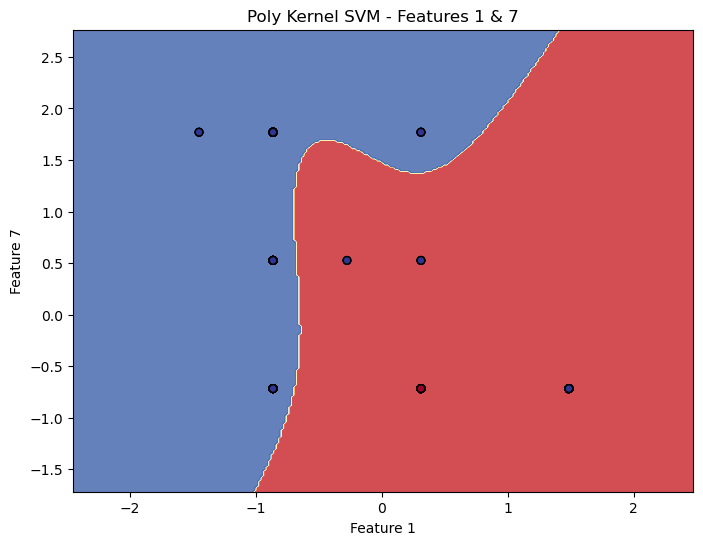

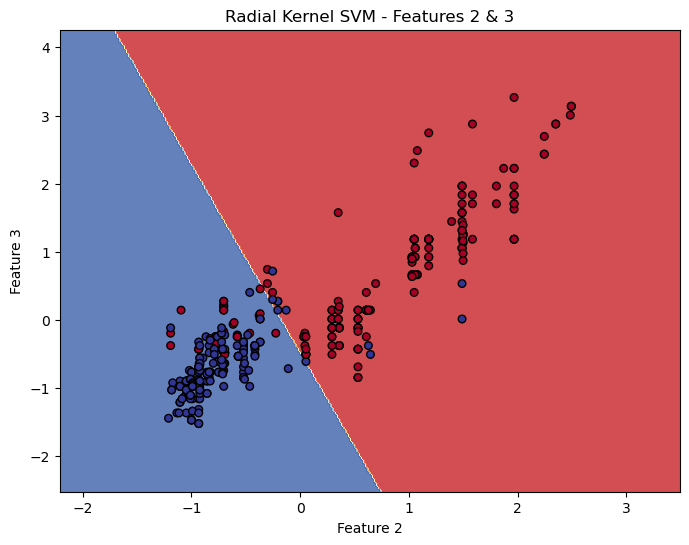

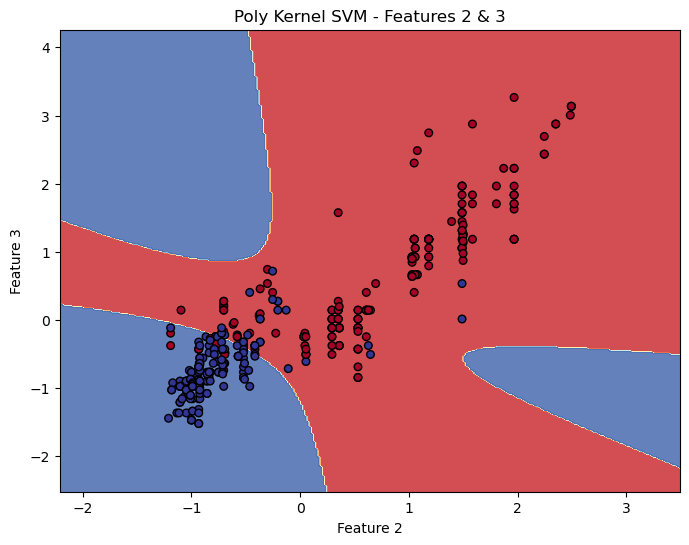

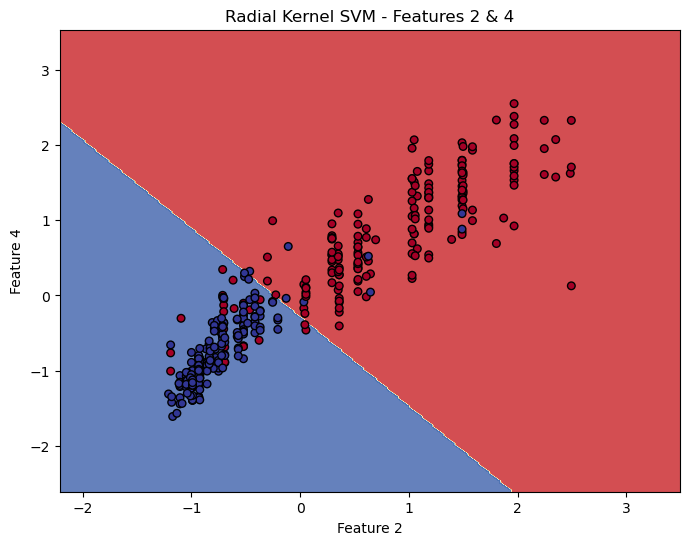

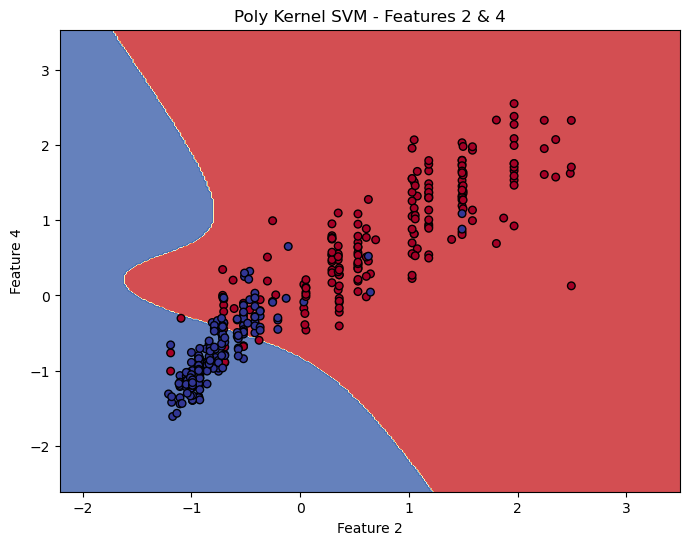

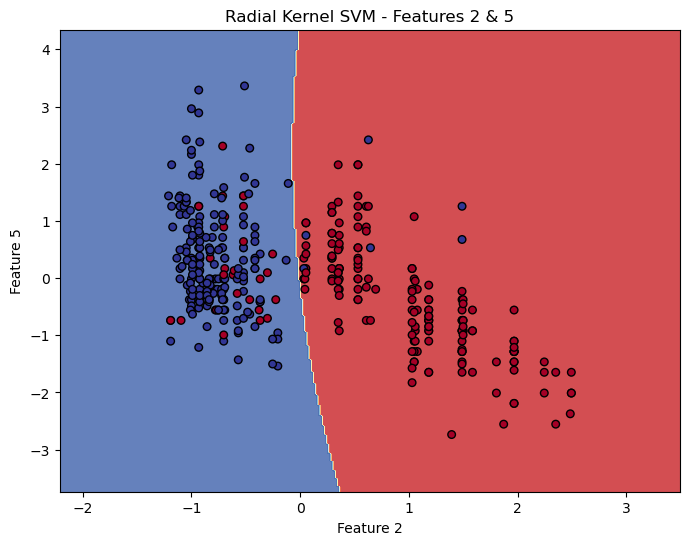

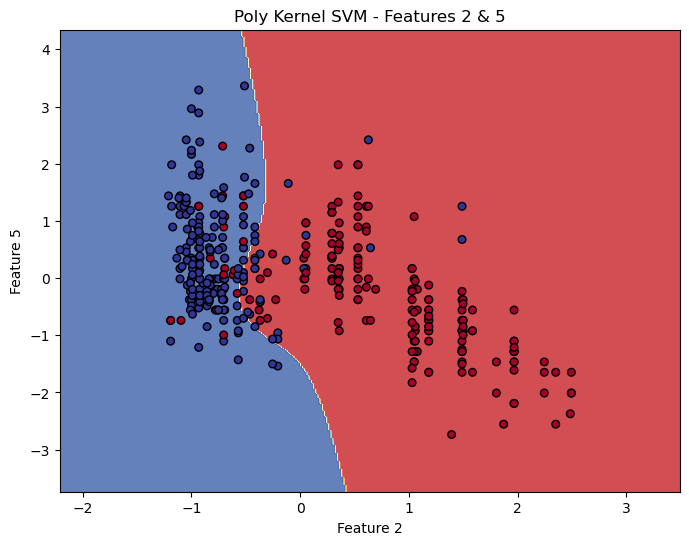

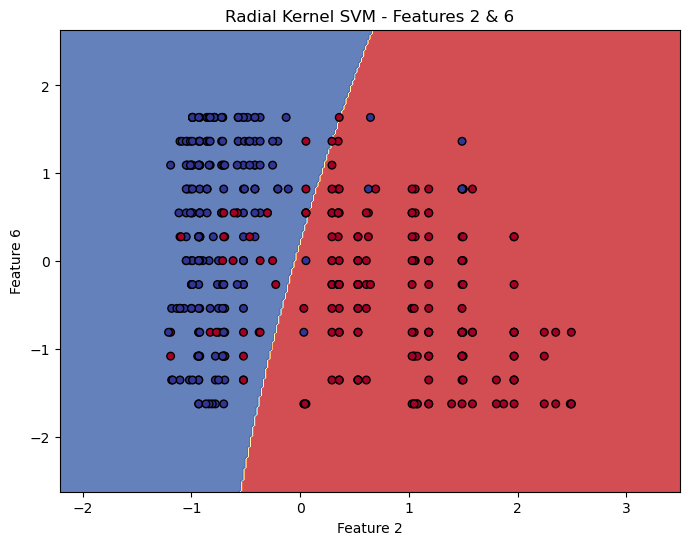

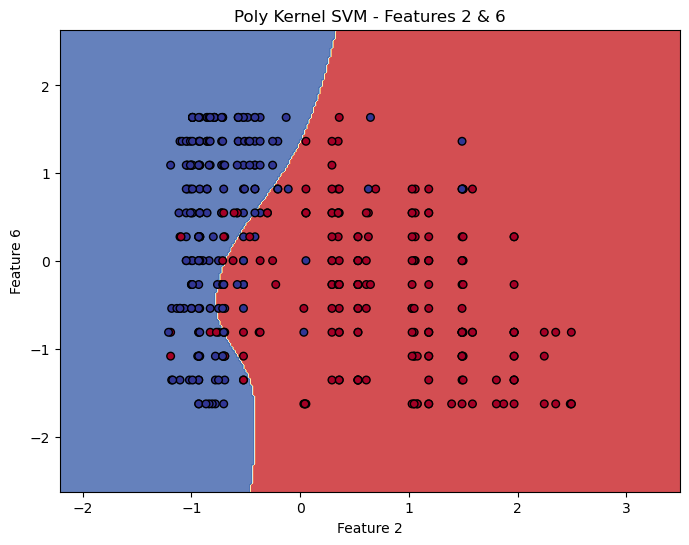

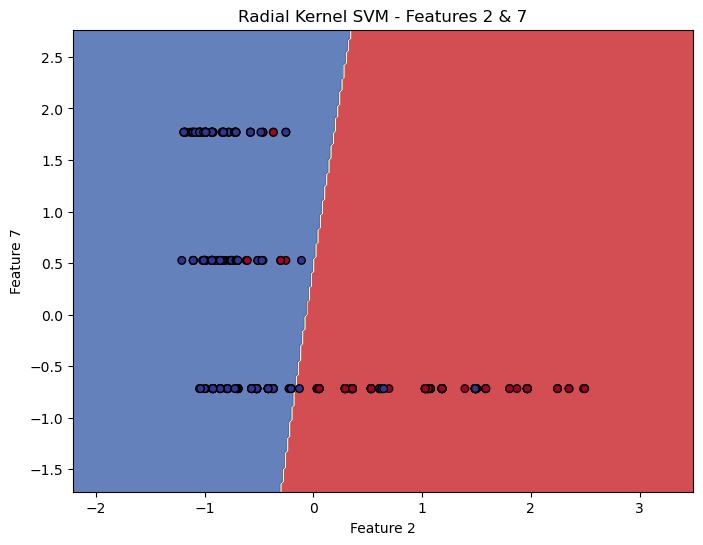

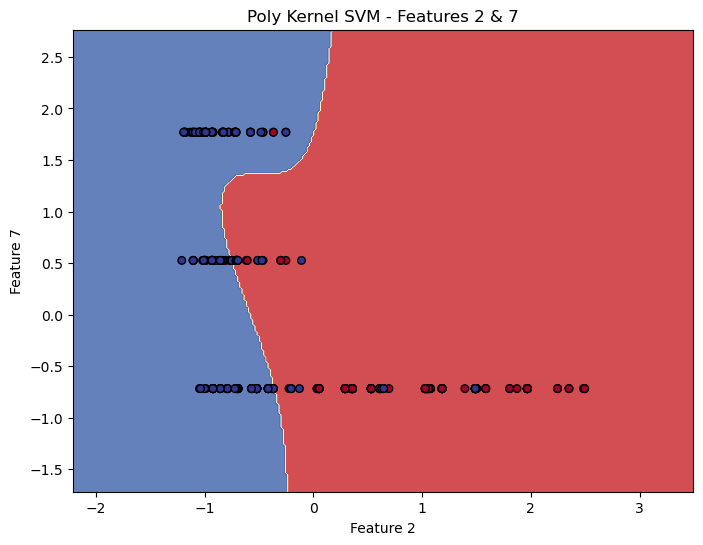

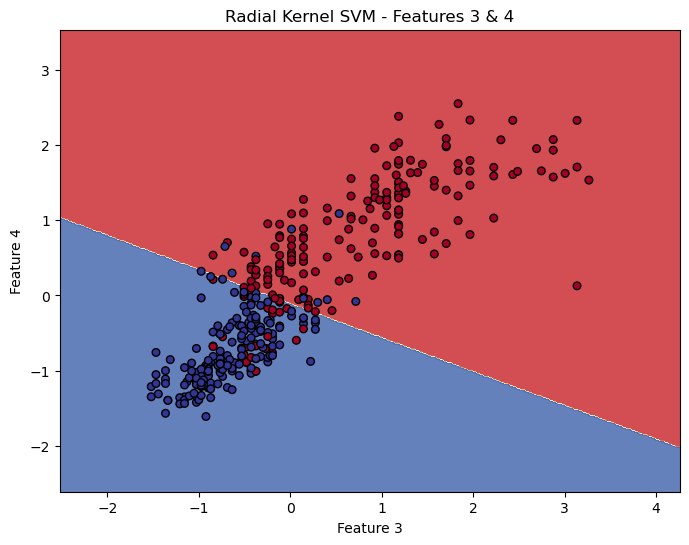

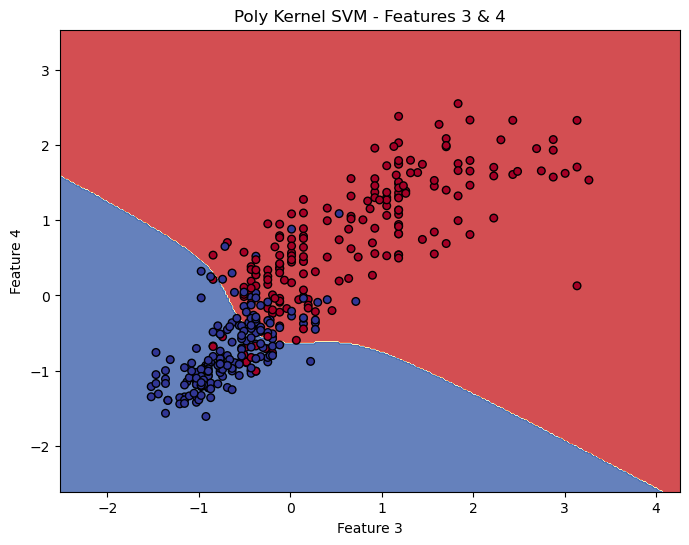

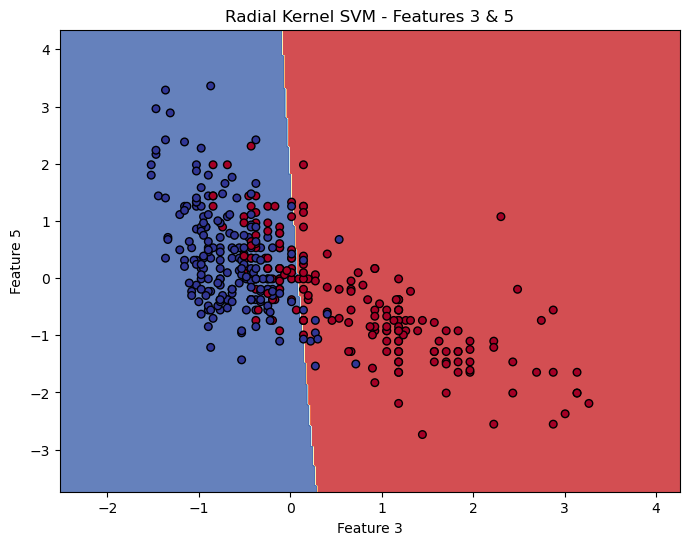

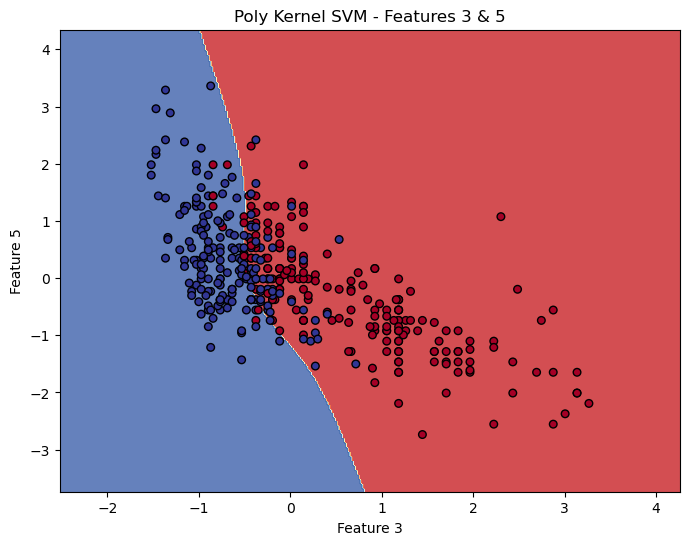

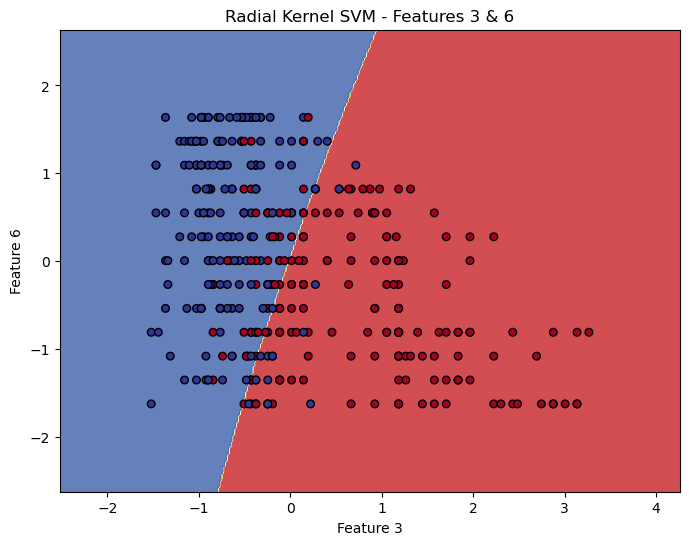

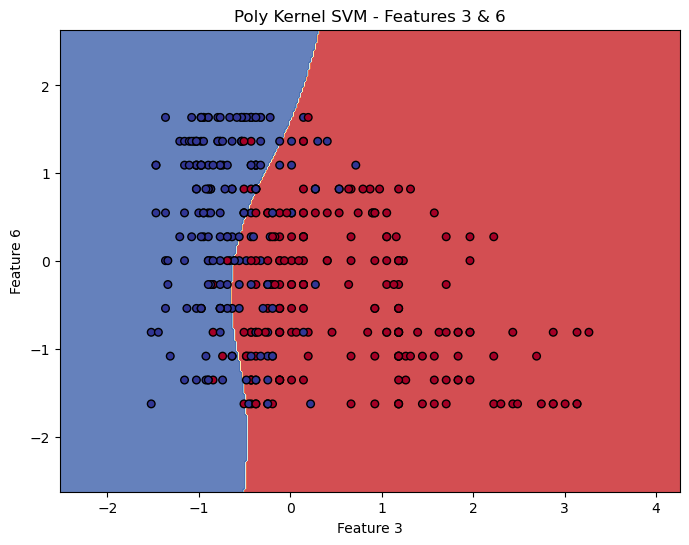

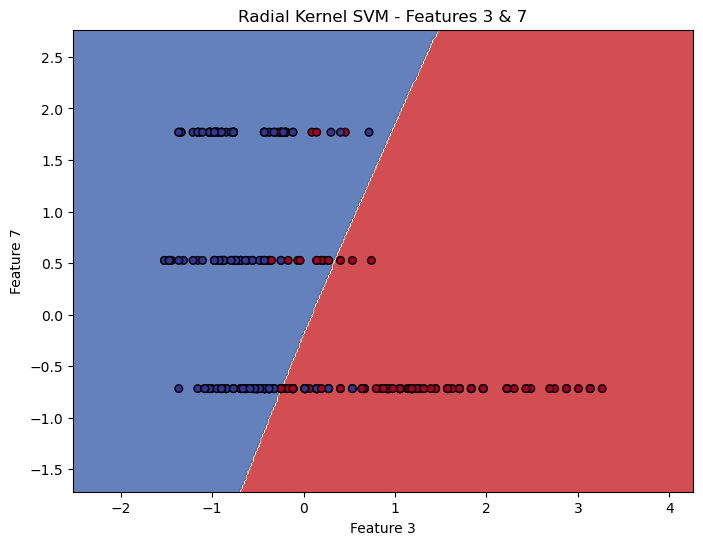

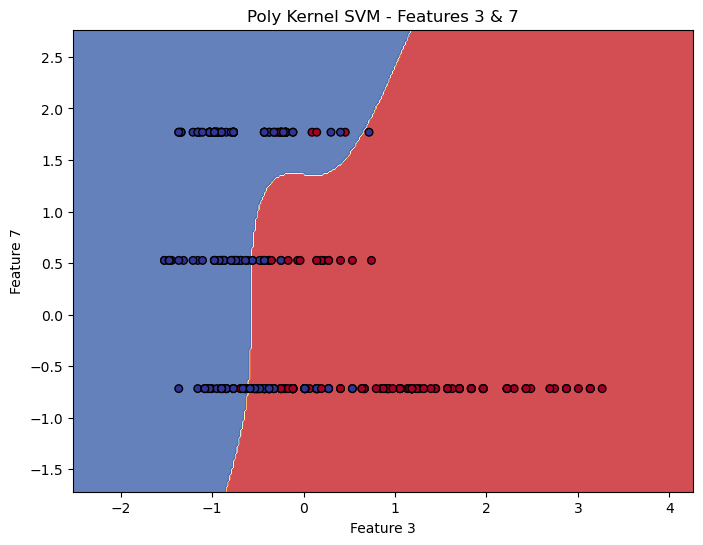

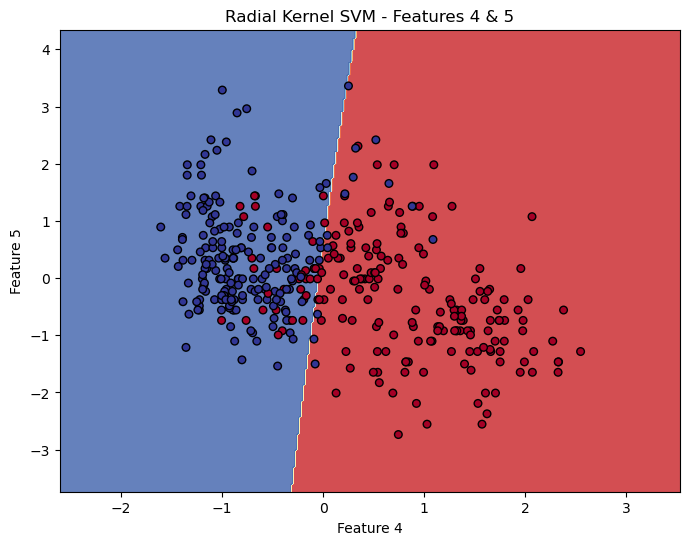

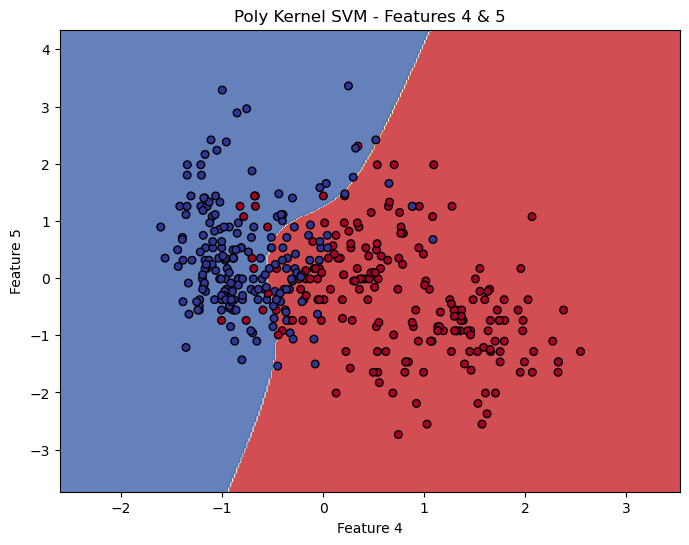

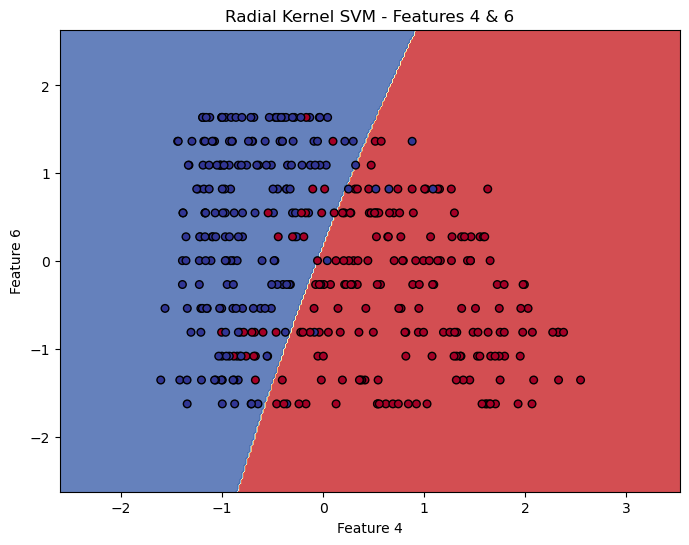

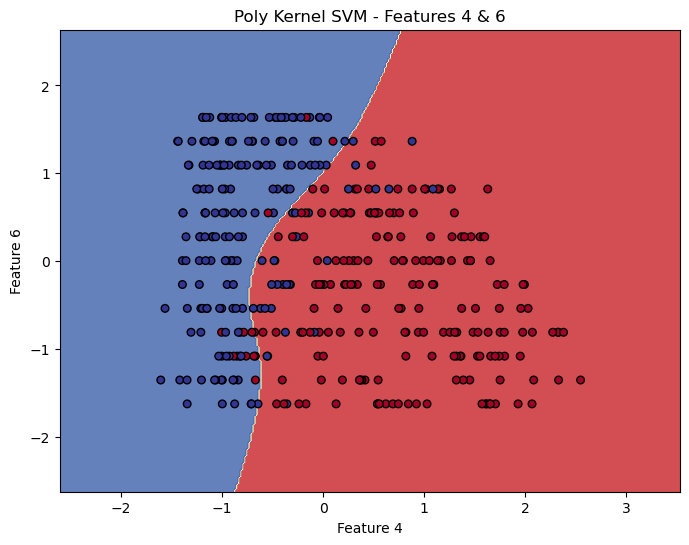

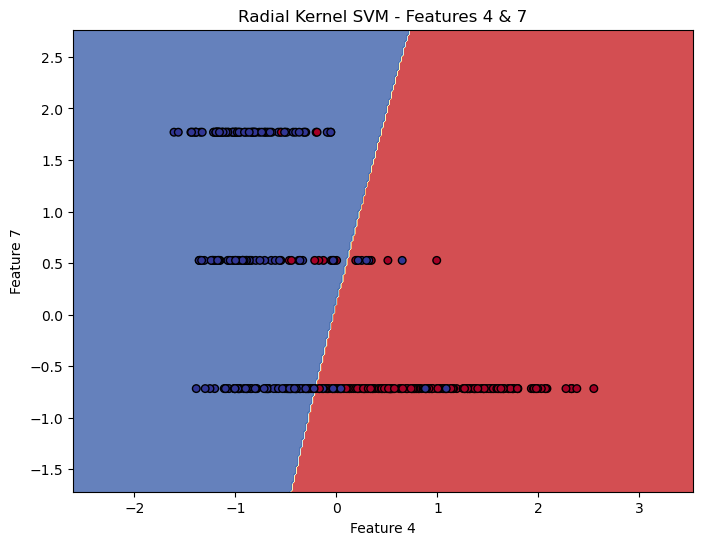

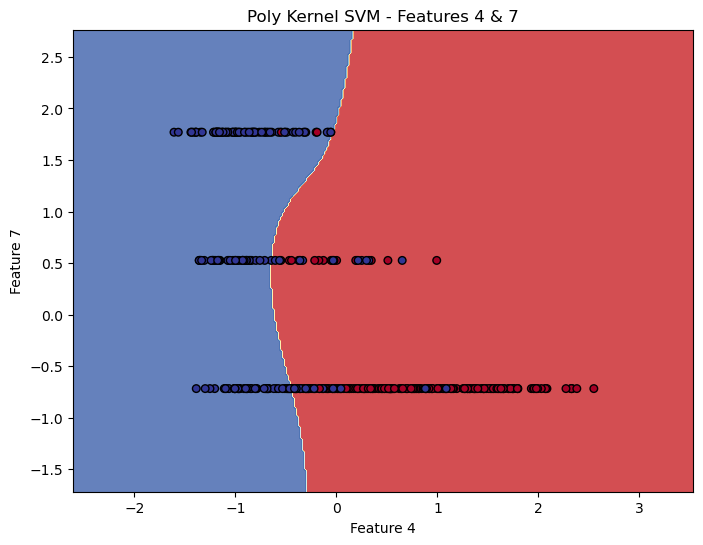

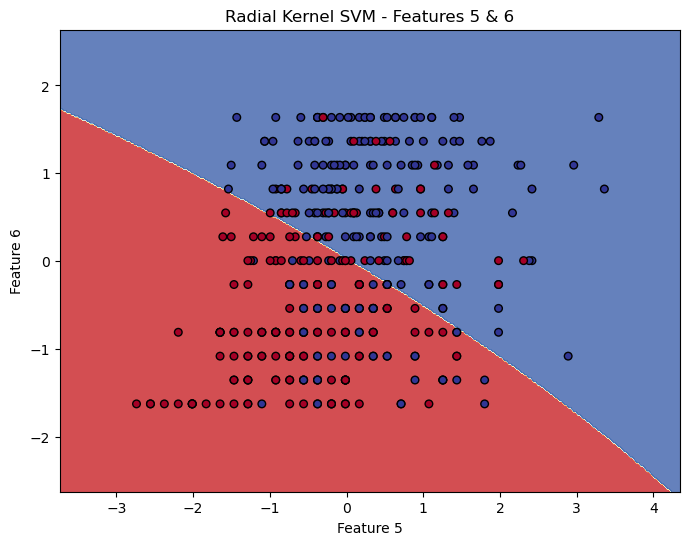

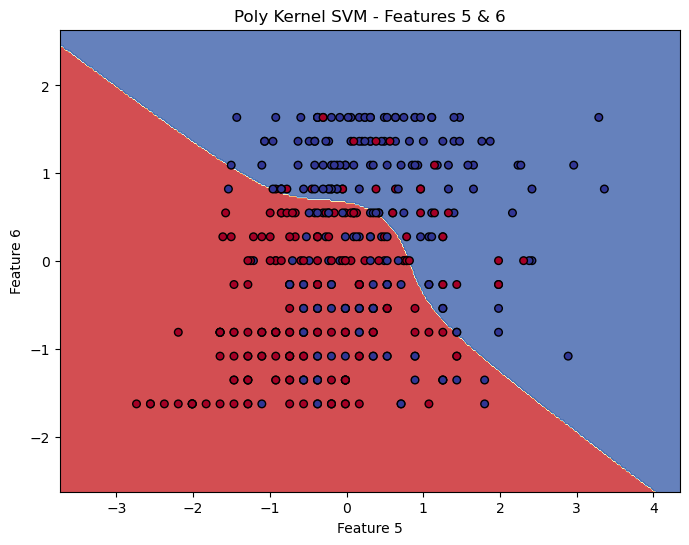

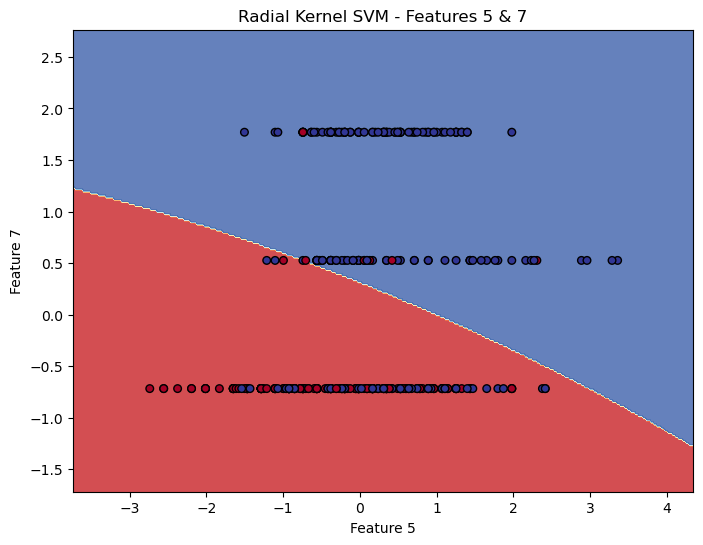

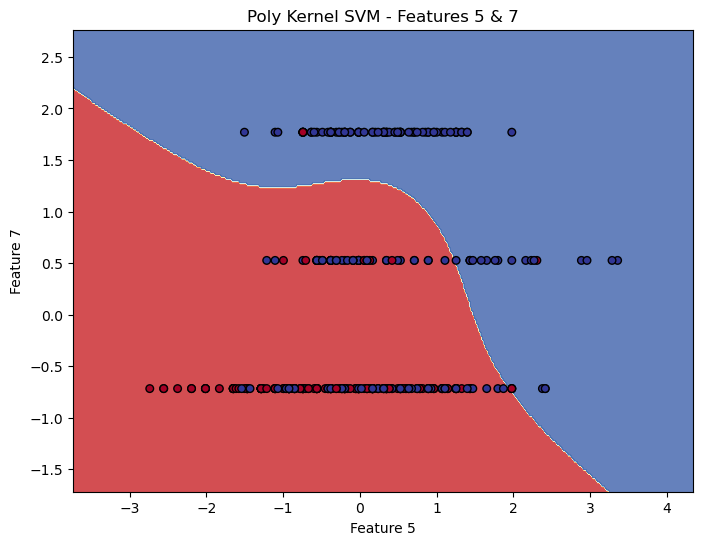

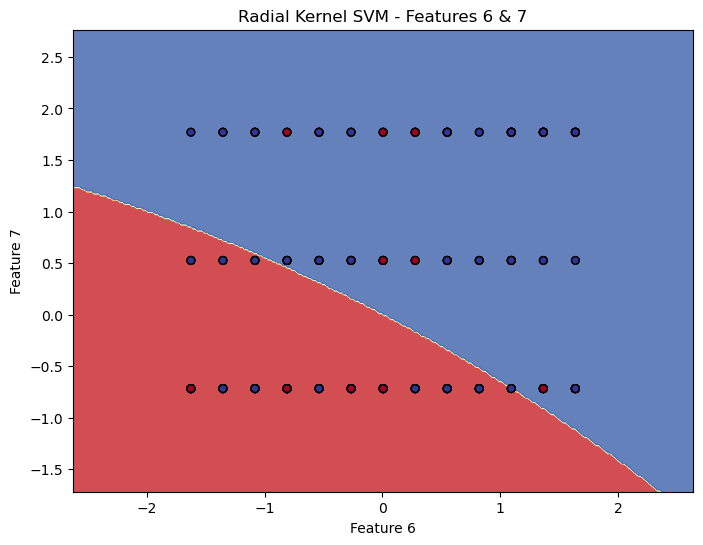

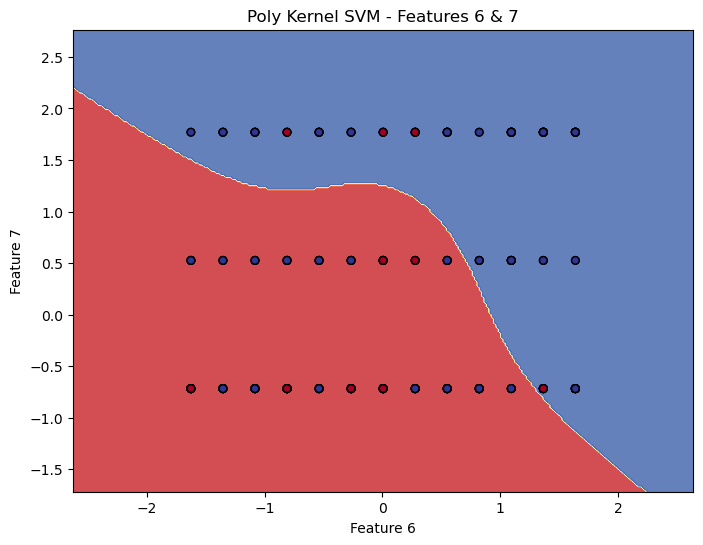

In [54]:
import itertools
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # For demonstration purposes

# Function to plot the decision boundary for each pair of features
def plot_svm_decision_boundary(model, X, y, features, title=""):
    # Extract the two features specified
    X_2d = X[:, features]
    
    # Create a meshgrid for plotting
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.8)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='RdYlBu', s=30, edgecolors='k')
    
    # Set labels and title
    plt.xlabel(f'Feature {features[0] + 1}')
    plt.ylabel(f'Feature {features[1] + 1}')
    plt.title(title)
    
    # Show the plot
    plt.show()

# Iterate through all pairs of features to plot decision boundaries
n_features = X_scaled.shape[1]  # Total number of features

# Iterate over all possible pairs of features
for features in itertools.combinations(range(n_features), 2):
    # Create subsets of X_scaled and retrain the model for each pair of features
    X_pair = X_scaled[:, features]
    
    # Train SVM model with radial kernel on the current pair of features
    radial_model = SVC(C=grid_search_radial.best_params_['C'],
                       gamma=grid_search_radial.best_params_['gamma'],
                       kernel='rbf')
    radial_model.fit(X_pair, y)
    plot_svm_decision_boundary(radial_model, X_scaled, y, features, title=f"Radial Kernel SVM - Features {features[0] + 1} & {features[1] + 1}")
    
    # Train SVM model with poly kernel on the current pair of features
    poly_model = SVC(C=grid_search_poly.best_params_['C'],
                     degree=grid_search_poly.best_params_['degree'],
                     kernel='poly')
    poly_model.fit(X_pair, y)
    plot_svm_decision_boundary(poly_model, X_scaled, y, features, title=f"Poly Kernel SVM - Features {features[0] + 1} & {features[1] + 1}")


In [55]:
import itertools
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # For demonstration purposes

# Function to plot the decision boundary for each pair of features
def plot_svm_decision_boundary(model, X, y, features, title=""):
    # Extract the two features specified
    X_2d = X[:, features]
    
    # Create a meshgrid for plotting
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.8)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='RdYlBu', s=30, edgecolors='k')
    
    # Set labels and title
    plt.xlabel(f'Feature {features[0] + 1}')
    plt.ylabel(f'Feature {features[1] + 1}')
    plt.title(title)
    
    # Show the plot
    plt.show()

# Limit the number of plots by selecting a subset of feature pairs
n_plots = 5  # Choose a number of plots you want to display
n_features = X_scaled.shape[1]  # Total number of features

# Choose a random sample of feature pairs
selected_pairs = list(itertools.combinations(range(n_features), 2))
selected_pairs = random.sample(selected_pairs, n_plots)

# Iterate through the selected pairs of features and plot decision boundaries
for features in selected_pairs:
    # Create subsets of X_scaled and retrain the model for each pair of features
    X_pair = X_scaled[:, features]
    
    # Train SVM model with radial kernel on the current pair of features
    radial_model = SVC(C=grid_search_radial.best_params_['C'],
                       gamma=grid_search_radial.best_params_['gamma'],
                       kernel='rbf')
    radial_model.fit(X_pair, y)
    plot_svm_decision_boundary(radial_model, X_pair, y, features, title=f"Radial Kernel SVM - Features {features[0] + 1} & {features[1] + 1}")
    
    # Train SVM model with poly kernel on the current pair of features
    poly_model = SVC(C=grid_search_poly.best_params_['C'],
                     degree=grid_search_poly.best_params_['degree'],
                     kernel='poly')
    poly_model.fit(X_pair, y)
    plot_svm_decision_boundary(poly_model, X_pair, y, features, title=f"Poly Kernel SVM - Features {features[0] + 1} & {features[1] + 1}")


NameError: name 'random' is not defined

### 8. This problem involves the OJ data set which is part of the ISLP package.

In [3]:
oj = pd.read_csv('OJ.csv',na_values=['?']).dropna()
oj

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [4]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

In [5]:
#oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})

oj['Store7'] = oj['Store7'].replace({'Yes': 1, 'No': 0})
oj.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.332710,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.471404,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,1.000000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,1.000000,0.402010,0.252688,0.440000,4.000000


In [6]:
oj['Purchase'] = oj['Purchase'].map({'MM': 0, 'CH': 1})


### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [7]:
train_set, test_set = train_test_split(oj, train_size=800, random_state=42)
X_train = train_set.drop('Purchase', axis=1)
y_train = train_set['Purchase']
X_test = test_set.drop('Purchase', axis=1)
y_test = test_set['Purchase']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (b) Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as predictors. How many support points are there?

In [8]:
svm_clf = SVC(C=0.01, kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Count the number of support points
support_points = len(svm_clf.support_)
print(f"Number of support points: {support_points}")

Number of support points: 430


### (c) What are the training and test error rates?

In [9]:
y_train_pred = svm_clf.predict(X_train_scaled)
y_test_pred = svm_clf.predict(X_test_scaled)

train_error_rate = 1 - accuracy_score(y_train, y_train_pred)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)

print(f"Training error rate: {train_error_rate:.4f}")
print(f"Test error rate: {test_error_rate:.4f}")

Training error rate: 0.1600
Test error rate: 0.1963


### (d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [ ]:
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 3, 5, 7, 8, 9, 10]}
clf = GridSearchCV(SVC(random_state=1, kernel='linear'), parameters, n_jobs=4, cv=10)
clf.fit(X=X_train, y=y_train.values.ravel())
clf.best_estimator_

In [ ]:
param_grid = {'C': np.logspace(0.01, 10, 100)}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Find the best parameter C
best_C = grid_search.best_params_['C']
print(f"Optimal C: {best_C}")

In [ ]:
param_grid = {'C': np.logspace(-2, 1, 10)}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Optimal C value
optimal_c = grid_search.best_params_['C']
print(f'Optimal value of C: {optimal_c}')

In [ ]:
# Define the parameter grid for C values
param_grid = {
    'C': np.linspace(0.01, 10, 100),  # 100 values from 0.01 to 10
}

# Define the support vector classifier (SVC) model
svc_model = SVC(kernel='linear', random_state=42)

# Use GridSearchCV to perform cross-validation and search for the best C value
grid_search = GridSearchCV(svc_model, param_grid, cv=10, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Optimal C value: {best_C}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Evaluate the model on the test set using the best C value
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy using optimal C: {test_accuracy:.4f}")

### (e) Compute the training and test error rates using this new value for C.

In [ ]:
svc_optimal = SVC(C=optimal_c, kernel='linear')
svc_optimal.fit(X_train, y_train)

y_train_pred_optimal = svc_optimal.predict(X_train)
y_test_pred_optimal = svc_optimal.predict(X_test)

train_error_rate_optimal = 1 - accuracy_score(y_train, y_train_pred_optimal)
test_error_rate_optimal = 1 - accuracy_score(y_test, y_test_pred_optimal)

print(f'Training error rate with optimal C: {train_error_rate_optimal:.4f}')
print(f'Test error rate with optimal C: {test_error_rate_optimal:.4f}')

### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [ ]:
svm_clf = SVC(C=0.01, kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Count the number of support points
support_points = len(svm_clf.support_)
print(f"Number of support points: {support_points}")

### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

### (h) Overall, which approach seems to give the best results on this data?